## Assignement 1

1. The data-sheet fo the JL-55-23 specifies different RX sensitivity levels for different data rates. Additionally, assume that for the correct decoding of the lowest modulation and coding scheme (MCS) a SNR of 0dB is required. What is the maximum allowed receiver noise figure at room temperature (T = 300K) for the given system?

In [1]:
Kᵦ = 1.38e-23; @show Kᵦ # Boltzmann constant
Tₑ = 300; @show Tₑ; # Average Room Temperature [290 ~ 300k]  Kelvin 

Kᵦ = 1.38e-23
Tₑ = 300


In [2]:
# 10 * log10( 1.38e-23 * 300 ) + 30
N₀ = 10 * log10( Kᵦ * Tₑ ) + 30; @show round( N₀ , digits = 0); # Termal Noise -174 dBm 

round(N₀, digits = 0) = -174.0


In [3]:
B = 10 * log10(40e6); # B Bandwidth

In [4]:
SNR = 0; @show SNR; # dB

SNR = 0


In [5]:
Pₙ = N₀ + B; @show round( Pₙ , digits = 1); # Total Rx Noise = -174 dBm + 10log(B) in dB

round(Pₙ, digits = 1) = -97.8


In [6]:
Rₓₛ =  -97; # MIMO Data Rates & RX-sensitivity (lowest MCS [0 - 15 Mbps] value -97 dB

Supported Link rates: in Datasheet JLG-55-23.pdf

<table border="1">
    <tr>
        <th>MIMO Data Rates &amp; RX-sensitivity</th>
    </tr>
    <tr>
        <td>MCS 15 – 300 Mbps</td>
        <td>-74 dBm</td>
    </tr>
    <tr>
        <td>MCS 14 – 270 Mbps</td>
        <td>-76 dBm</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
    </tr>
    <tr>
        <td>MCS 1 - 30 Mbps</td>
        <td>-94 dBm</td>
    </tr>
    <tr>
        <td>MCS 0 - 15 Mbps</td>
        <td>-97 dBm</td>
    </tr>
</table>


In [7]:
# Rx Sensitivity 
# Rₓ = N₀ + F + B + SNR  # Pn (dbM) + F (dB) + B (dB) + SNR (dB)

In [8]:
Rᵥ =  N₀ + B + SNR 

-97.80939667551138

In [9]:
F = Rₓₛ - Rᵥ # In dB

0.8093966755113797

In [10]:
10^(F/10) # In linear

1.2048685476865195

2. Plot the measurement data (RSSI vs distance) for both polarizations. Try to explain where the difference between the two polarizations comes from!


In [26]:
## Receive the signal
include("./data/rssi.jl");

In [43]:
(d1[1], rssi1[1])

(1.8653272068664895, -62.0)

In [42]:
(d2, rssi2)

([1.8653272068664895 1.8653272068664895 … 10.1115758645968 10.111598504057948], [-70.0 -71.0 … -87.0 -85.0])

In [28]:
using Plots

In [45]:
rᵣₓ³ = 10 * log10.(abs.( rssi1 ))

1×6978 Matrix{Float64}:
 17.9239  17.9239  17.9239  17.9239  …  18.8081  18.8081  18.8081  18.7506

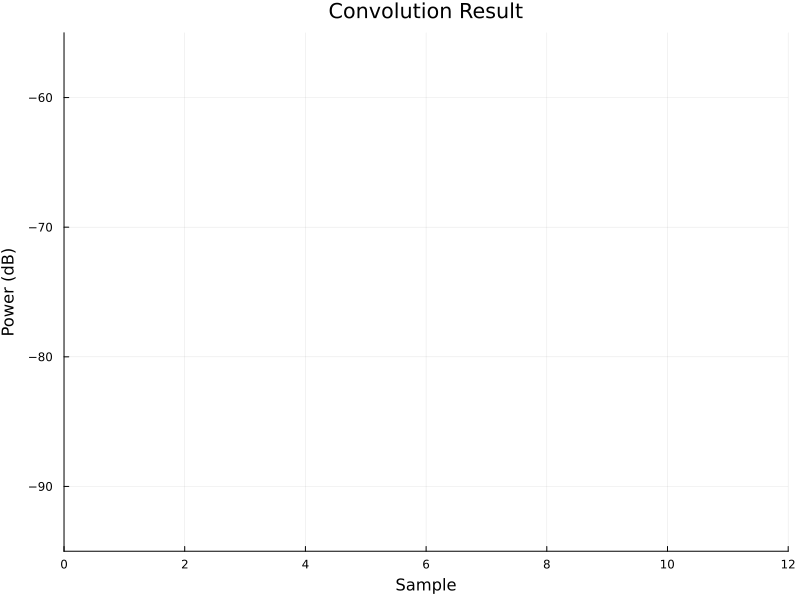

In [46]:
plot(d1, rᵣₓ³, xlabel="Sample", ylabel="Power (dB)", title="Convolution Result"
    , label = "rᵣₓ³"
    , xlim=(0, 12), ylim=(-95, -55)
    , size = (800,600)
    , legend = :false
)

```matlab
>> plot(d1,rssi1)
>> hold on
>> plot(d2,rssi2)
>> legend
>> legend('horizontal','vertical')
```


<img src=images/rssi12_plots.png width='75%' height='75%' > </img>

3. Take the two-path model without the large distance approximation (Equation (4.55) from the Appendix), and compute the received signal strength according to

$PRx(d) = |Etot(d)|2Ae$,
where Ae is the receive antenna aperture, which is related to the receive
antenna gain by G = 4π A . Further use |E(d)|2 = PTxGTx to compute Rx λ2 e 4πd2
the power density at 1m. Implement this as a function in Matlab.